In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/calories.csv')

In [3]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [63]:
df['Cals'] = df['Cals_per100grams'].apply(lambda x: x.strip(' cal')).astype(int)
df['KJ'] = df['KJ_per100grams'].apply(lambda x: x.strip(' kJ')).astype(int)

In [64]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams,Cals,KJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ,62,260
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ,48,202
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ,92,386
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ,88,370
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ,54,227


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 7 columns):
FoodCategory        2225 non-null object
FoodItem            2225 non-null object
per100grams         2225 non-null object
Cals_per100grams    2225 non-null object
KJ_per100grams      2225 non-null object
Cals                2225 non-null int64
KJ                  2225 non-null int64
dtypes: int64(2), object(5)
memory usage: 121.8+ KB


In [5]:
df.isnull().sum()

FoodCategory        0
FoodItem            0
per100grams         0
Cals_per100grams    0
KJ_per100grams      0
dtype: int64

In [8]:
df.nunique()

FoodCategory          44
FoodItem            1993
per100grams            2
Cals_per100grams     524
KJ_per100grams       524
dtype: int64

In [9]:
df.FoodCategory.unique()

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [11]:
df.groupby('FoodCategory').FoodItem.count()

FoodCategory
(Fruit)Juices                    46
AlcoholicDrinks&Beverages        48
BakingIngredients                95
Beef&Veal                        39
Beer                             85
Cakes&Pies                       91
Candy&Sweets                     81
CannedFruit                      29
CerealProducts                   44
Cheese                           53
ColdCuts&LunchMeat               35
CreamCheese                      17
Dishes&Meals                     78
FastFood                         72
Fish&Seafood                     60
Fruits                           54
Herbs&Spices                     90
IceCream                         45
Legumes                          62
Meat                             46
Milk&DairyProducts               33
Non-AlcoholicDrinks&Beverages    51
Nuts&Seeds                       39
Oatmeal,Muesli&Cereals           76
Offal&Giblets                    33
Oils&Fats                        30
Pasta&Noodles                    40
Pastries,Breads

In [42]:
summary = df.groupby('FoodCategory').Cals.agg(['mean', 'min', 'max', 'std'])
summary.head()

,mean,min,max,std
FoodCategory,,,,
(Fruit)Juices,54.500000,0,233,35.949811
AlcoholicDrinks&Beverages,207.937500,43,358,92.227611
BakingIngredients,324.168421,0,884,179.051856
Beef&Veal,237.102564,94,902,162.085389
Beer,39.176471,15,74,10.884870


<Figure size 1008x1008 with 0 Axes>

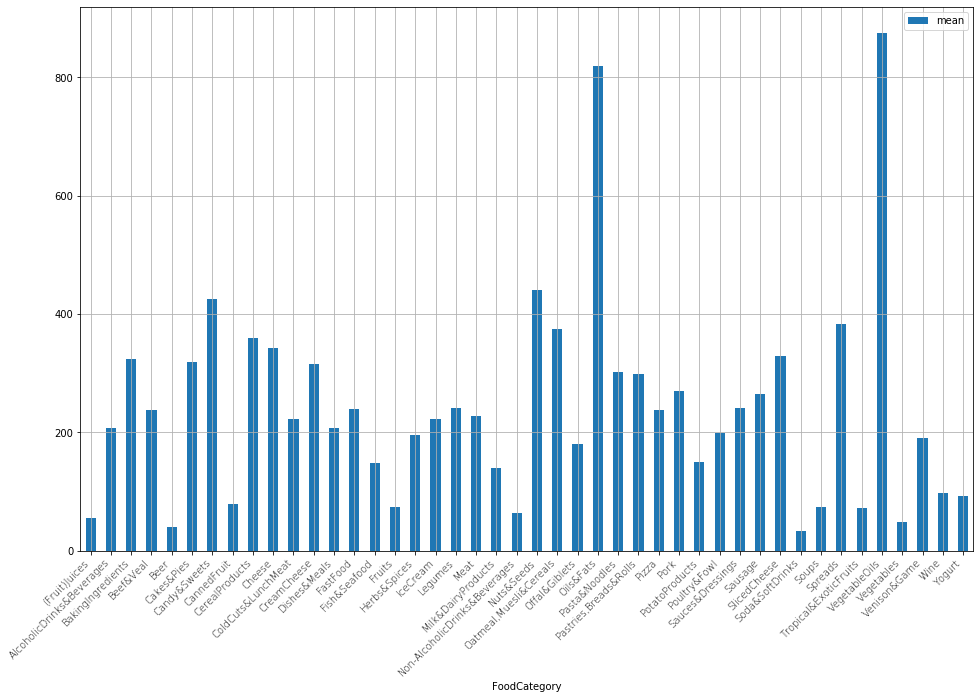

In [54]:
plt.figure(figsize=(14, 14))
summary.plot(kind='bar', y='mean', figsize=(16, 10), rot=45)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.grid(True)

In [83]:
sorted_summary = summary.sort_values(by='mean', ascending=False)

<Figure size 1008x1008 with 0 Axes>

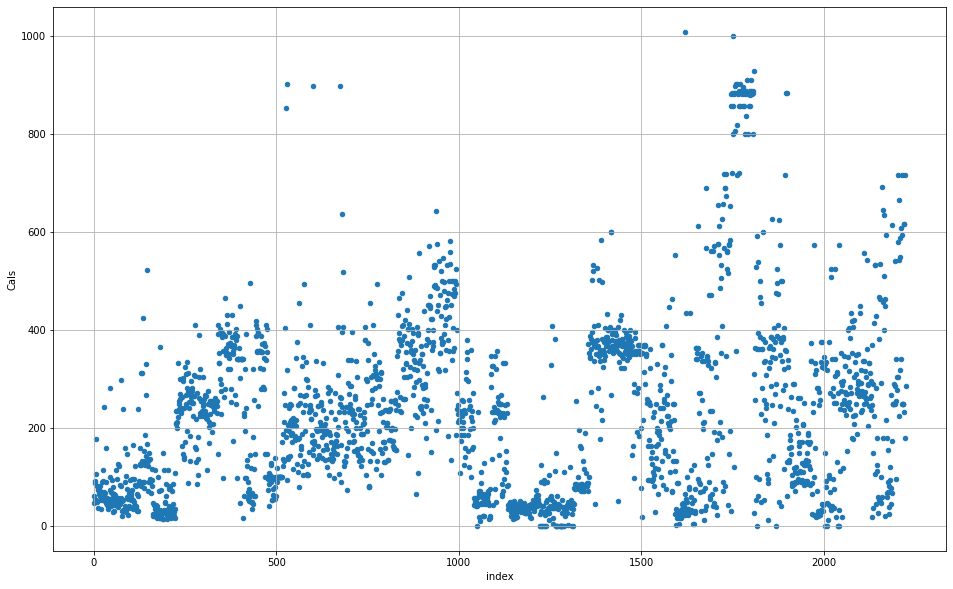

In [69]:
plt.figure(figsize=(14, 14))
df.reset_index().plot(kind='scatter', x='index', y='Cals', figsize=(16, 10))
plt.grid(True)

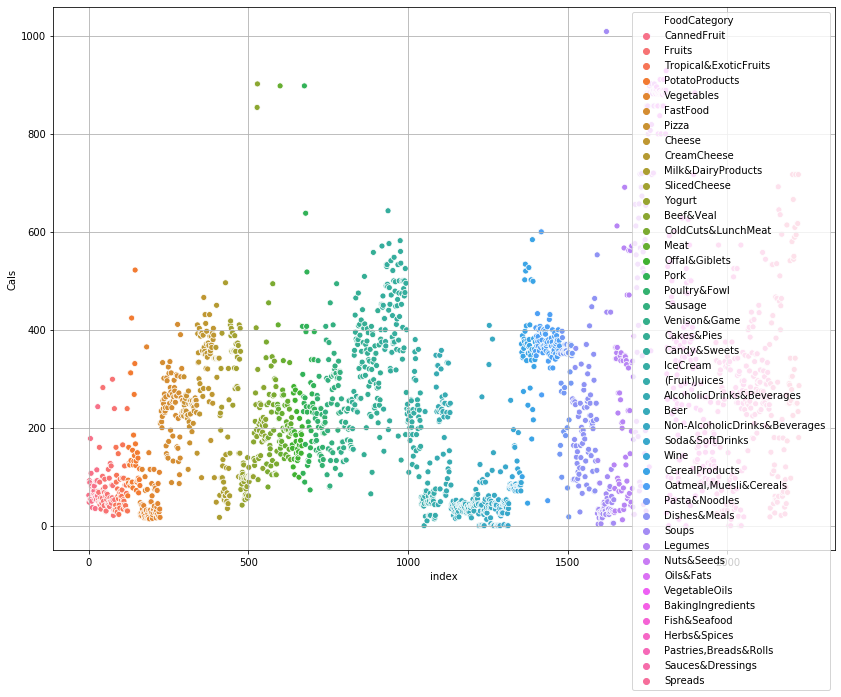

In [79]:
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.scatterplot(data=df.reset_index(), x='index', y='Cals', hue='FoodCategory')
plt.grid(True)

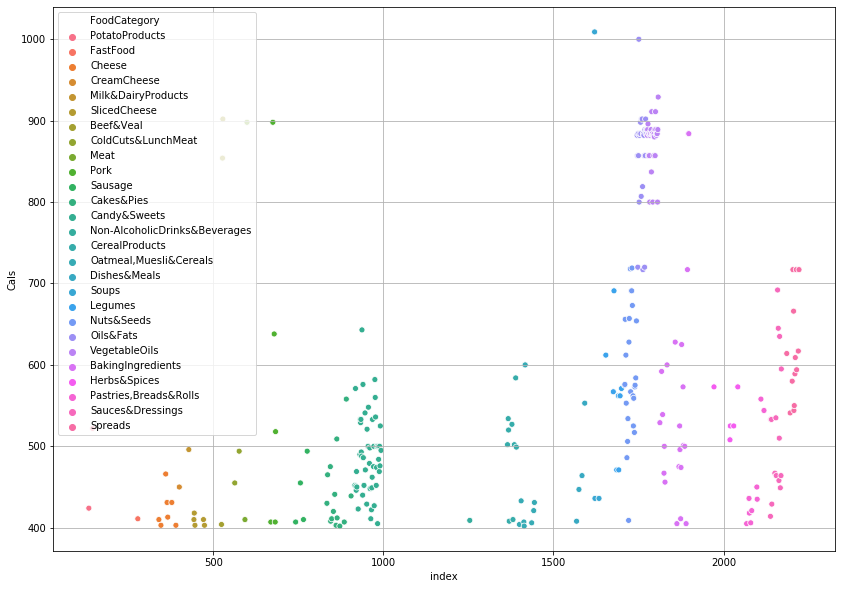

In [78]:
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.scatterplot(data=df[df.Cals>400].reset_index(), x='index', y='Cals', hue='FoodCategory')
plt.grid(True)

In [104]:
top = list(sorted_summary.head(4).index)
print(top)

['VegetableOils', 'Oils&Fats', 'Nuts&Seeds', 'Candy&Sweets']


<Figure size 1008x720 with 0 Axes>

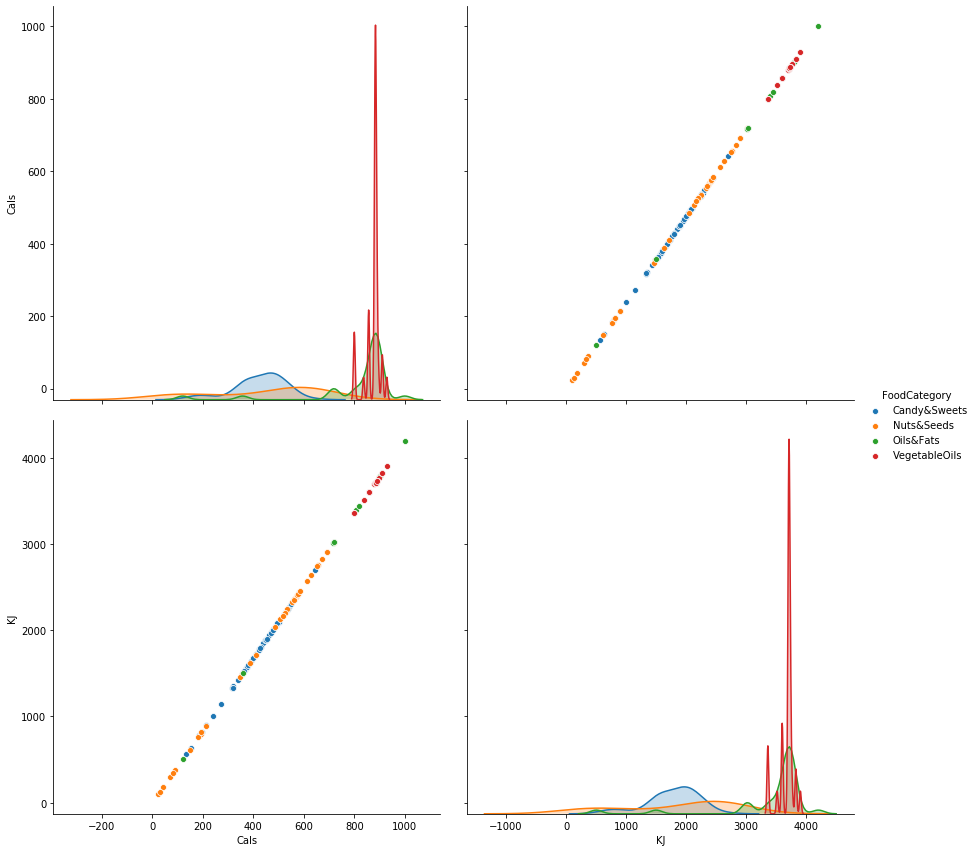

In [105]:
plt.figure(figsize=(14, 10))
sns.pairplot(data=df[df.FoodCategory.isin(top)], hue='FoodCategory', height=6)

In [106]:
top = list(sorted_summary.head(2).index)
print(top)

['VegetableOils', 'Oils&Fats']


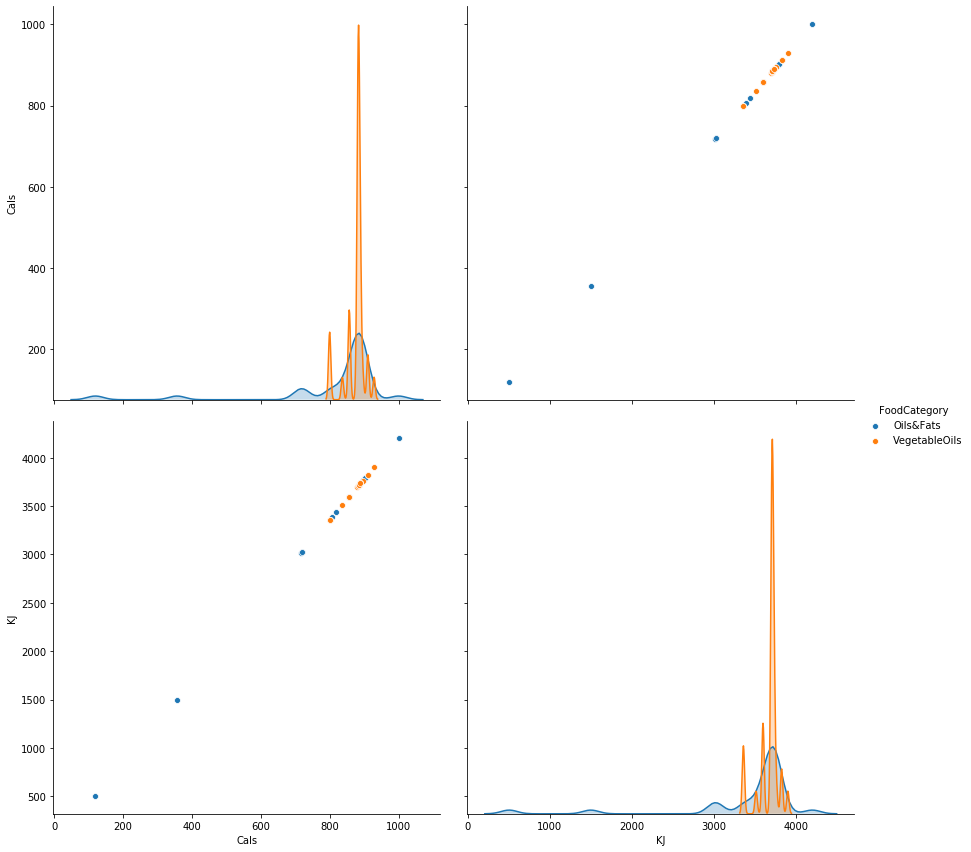

In [107]:
sns.pairplot(data=df[df.FoodCategory.isin(top)], hue='FoodCategory', height=6)

In [111]:
df[df['FoodCategory'].isin(top)].sort_values(by='Cals', ascending=False)[['FoodCategory', 'FoodItem', 'Cals']]

,FoodCategory,FoodItem,Cals
1751,Oils&Fats,Cod Liver Oil,1000
1808,VegetableOils,Wheat Germ Oil,929
1800,VegetableOils,Salmon Oil,911
1789,VegetableOils,Menhaden Oil,911
1759,Oils&Fats,Herring Oil,902
...,...,...,...
1768,Oils&Fats,Real Butter,720
1748,Oils&Fats,Butter,720
1763,Oils&Fats,Margarine,717
1760,Oils&Fats,I can\’t believe it\’s not Butter,357


In [115]:
df2 = df[~df['FoodCategory'].isin(top)]
df2.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams,Cals,KJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ,62,260
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ,48,202
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ,92,386
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ,88,370
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ,54,227


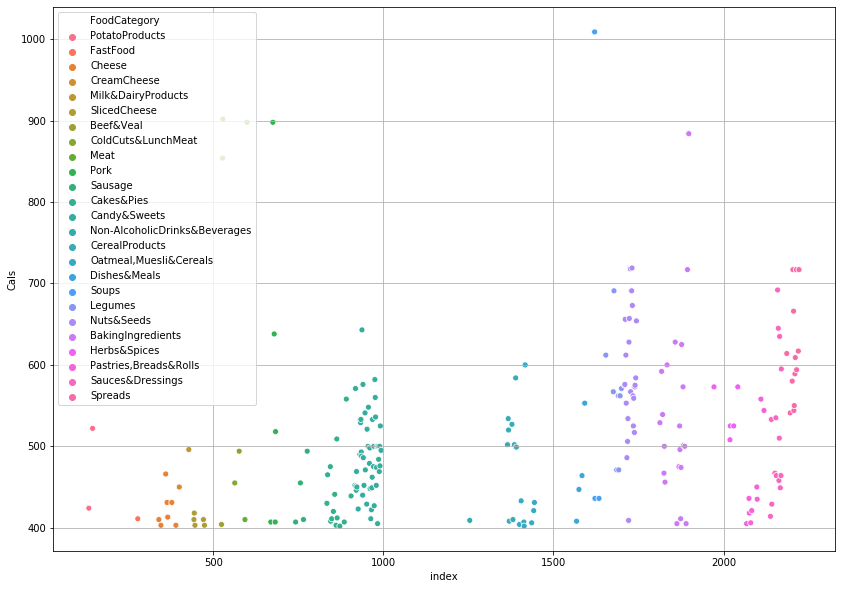

In [116]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df2[df2.Cals>400].reset_index(), x='index', y='Cals', hue='FoodCategory')
plt.grid(True)

In [118]:
df2.sort_values(by='Cals', ascending=False).head(20)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams,Cals,KJ
1621,Soups,Goulash,100g,1009 cal,4238 kJ,1009,4238
528,Beef&Veal,Beef Tallow,100g,902 cal,3788 kJ,902,3788
599,Meat,Chicken Fat,100g,898 cal,3772 kJ,898,3772
675,Pork,Lard,100g,898 cal,3772 kJ,898,3772
1897,BakingIngredients,Vegetable Oil,100g,884 cal,3713 kJ,884,3713
1898,BakingIngredients,Vegetable Shortening,100g,884 cal,3713 kJ,884,3713
527,Beef&Veal,Beef Suet,100g,854 cal,3587 kJ,854,3587
1731,Nuts&Seeds,Pili Nuts,100g,719 cal,3020 kJ,719,3020
1726,Nuts&Seeds,Macadamia Nuts,100g,718 cal,3016 kJ,718,3016
2204,Spreads,Margarine,100g,717 cal,3011 kJ,717,3011


In [120]:
df[df.FoodCategory=='Cakes&Pies'].sort_values(by='Cals', ascending=False).head(20)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams,Cals,KJ
891,Cakes&Pies,Puff Pastry,100g,558 cal,2344 kJ,558,2344
863,Cakes&Pies,Flourless Chocolate Cake,100g,509 cal,2138 kJ,509,2138
844,Cakes&Pies,Caramel Cake,100g,475 cal,1995 kJ,475,1995
836,Cakes&Pies,Birthday Cake,100g,465 cal,1953 kJ,465,1953
857,Cakes&Pies,Crumb Cake,100g,441 cal,1852 kJ,441,1852
905,Cakes&Pies,Swiss Roll,100g,439 cal,1844 kJ,439,1844
834,Cakes&Pies,Bakewell Tart,100g,430 cal,1806 kJ,430,1806
853,Cakes&Pies,Chocolate Muffin,100g,420 cal,1764 kJ,420,1764
864,Cakes&Pies,French Cruller,100g,412 cal,1730 kJ,412,1730
848,Cakes&Pies,Chess Pie,100g,411 cal,1726 kJ,411,1726
